# Implementing a Hough Transform on Edge Detected Image

## To find lane lines, we specify some parameters to say what kind of lines we detect (long lines, short lines, bendy lines, dashed lines, etc.).

### To do this, we'll be using an OpenCV function called HoughLinesP that takes several parameters. 
### Let's code it up and find the lane lines in the image we detected edges in with the Canny function.

### Here's the image we're working with:

![](edges-exitramp.jpg)

# lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

## Here, we are operating on the image masked_edges (the output from Canny) and the output from HoughLinesP will be lines, 
## lines is an array containing the endpoints (x1, y1, x2, y2) of all line segments detected by the transform operation. 
## The other parameters define just what kind of line segments we're looking for.

- ### Rho and theta are the distance and angular resolution of our grid in Hough space. 
- ### Remember that, in Hough space, we have a grid laid out along the (Θ, ρ) axis. 
- ###  Specify rho in units of pixels and theta in units of radians.

##  So, what are reasonable values? 
- ### Well, rho takes a minimum value of 1, 
- ### and a reasonable starting place for theta is 1 degree (pi/180 in radians).
- ###  Scale these values up to be more flexible in your definition of what constitutes a line.

- ### The threshold parameter specifies the minimum number of votes (intersections in a given grid cell) 
- ####  a candidate line needs to have to make it into the output. 

- ### The empty np.array([]) is just a placeholder, no need to change it. 
- ### min_line_length is the minimum length of a line (in pixels) that you will accept in the output, 
- ### max_line_gap is the maximum distance (in pixels) between segments that you will allow to be connected into a single line. 
- ### You can then iterate through your output lines and draw them onto the image to see what you got!


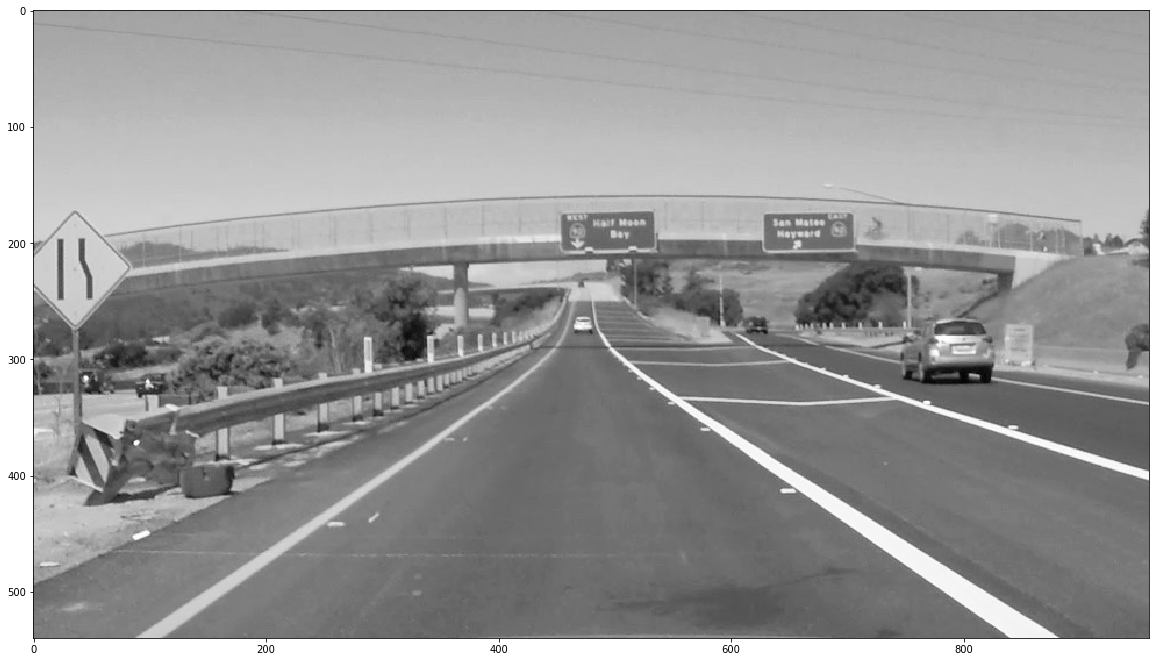

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(20, 12))
plt.imshow(gray, cmap='Greys_r')

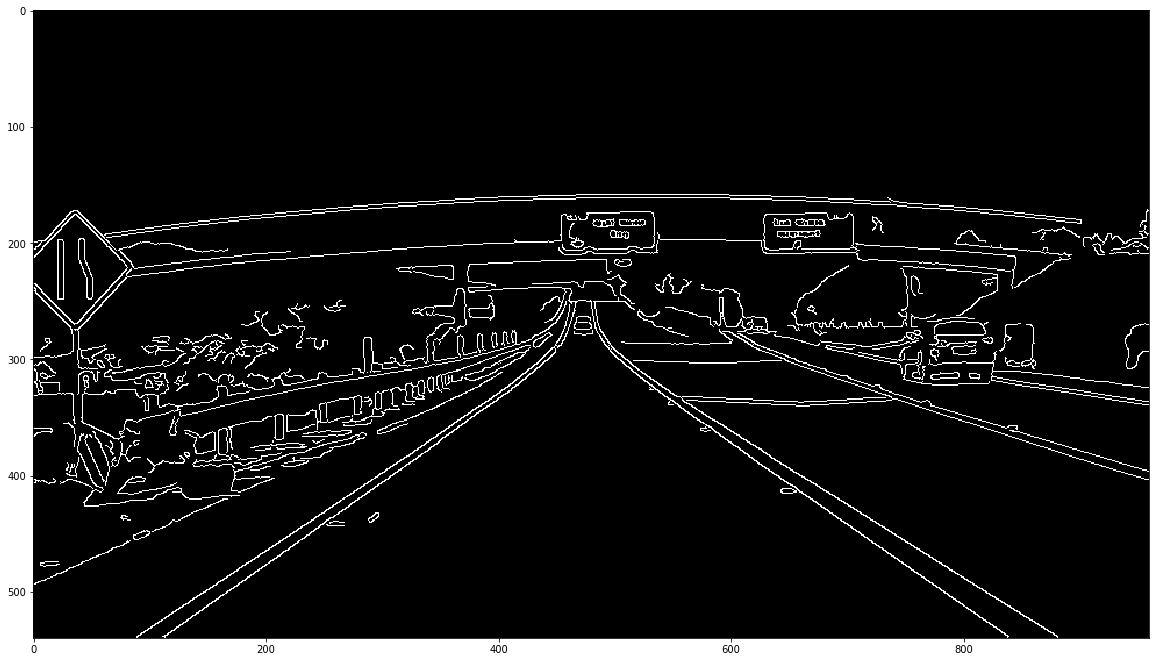

In [3]:
# Gaussian smoothing with kernel size 5
blur_gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny with low_threshold 50 and high threshold 150
masked_edges = cv2.Canny(blur_gray, 50, 150)

plt.figure(figsize=(20,12))
plt.imshow(masked_edges, cmap='Greys_r')

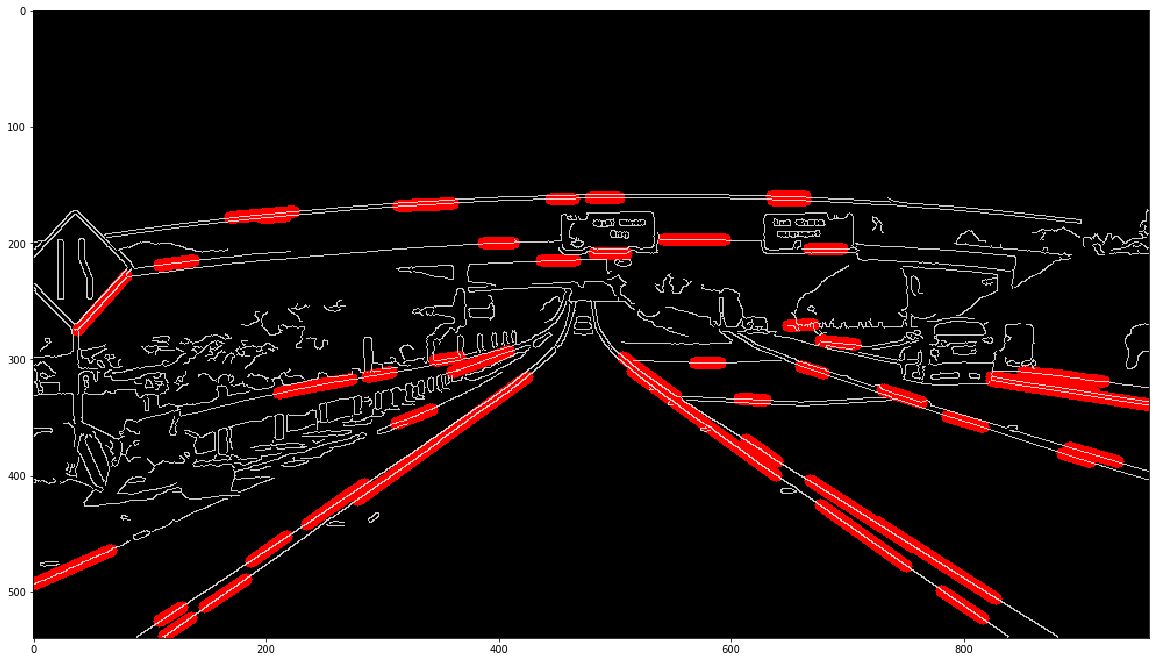

In [10]:
# Specify Hough transform parameters

rho = 3
theta = 3*np.pi/180
threshold = 5
min_line_length = 20
max_line_gap = 2

# create a blank image to draw lines on
line_img = np.copy(image)*0 

# Run Hough on edge detected images
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# Iterate over output lines and draw lines on the blank
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 10)


# Create a "color" binary image and combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges))
combo = cv2.addWeighted(color_edges, 0.8, line_img, 1, 0)

plt.figure(figsize=(20,12))
plt.imshow(combo)

## Here we've detected lots of line segments! 
## In the next exercise, we figure out which parameters do the best job of optimizing the detection of the lane lines. 
## Then, we'll want to apply a region of interest mask to filter out detected line segments in other areas of the image. 

## Earlier we used a triangular region mask, but this time we'll get a chance to use a quadrilateral region mask 
## using the cv2.fillPoly() function (keep in mind though, you could use this same method to mask an arbitrarily complex polygon region). 

## When you're finished you'll be ready to apply the skills you've learned to do the project at the end of this lesson.